In [12]:
%pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu
%pip install tensorflow mtcnn opencv-python numpy matplotlib seaborn Pillow

Looking in indexes: https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import os
import importlib

# Add src to path
sys.path.append('.')

# Force reload the modules
import src.preprocessing
import src.inference
import src.model
import src.visualization
importlib.reload(src.preprocessing)
importlib.reload(src.inference)
importlib.reload(src.model)
importlib.reload(src.visualization)

from src.model import load_model, FaceConcernDetector
from src.inference import predict
from src.visualization import plot_concern_results

In [7]:
# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load model
model_path = 'models/best_model.pth'

# Check if model exists, if not, create a dummy one for demo
if not os.path.exists(model_path):
    print("Model file not found. Creating a demo model with random weights...")
    print("Note: This is for demonstration only. Train a real model for actual predictions.")
    
    # Create model directory
    os.makedirs('models', exist_ok=True)
    
    # Create and save a dummy model
    model = FaceConcernDetector(num_concerns=4, pretrained=True)
    torch.save(model.state_dict(), model_path)
    print(f"Demo model saved to {model_path}")

model = load_model(model_path, device=device)
print("Model loaded successfully!")


Using device: cpu


c:\Users\Sanjay\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Sanjay\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded successfully!


# Specify image path
Use the sample image included with this repo. The cell below runs inference on the local `sample_images/test2.jpg` file.

# Check if image exists
image_path = os.path.join(os.getcwd(), 'sample_images', 'test2.jpg')  # File included in the project

if not os.path.exists(image_path):
    print(f"Image not found at {image_path}")
    print("Please provide a valid image path")
else:
    # Run inference
    scores, heatmaps, original_face = predict(
        model=model,
        image_path=image_path,
        device=device,
        generate_heatmaps=True,
        save_overlay=False
    )
    
    print("\n" + "="*50)
    print("DETECTION RESULTS")
    print("="*50)
    for concern, score in scores.items():
        print(f"{concern.replace('_', ' ').title()}: {score:.2f}%")
    print("="*50)

In [5]:
# Specify image path
import os
image_path = os.path.join(os.getcwd(), 'sample_images', 'test2.jpg')  # Use provided sample_images/test2.jpg

# Check if image exists
if not os.path.exists(image_path):
    print(f"Image not found at {image_path}")
    print("Please provide a valid image path")
else:
    # Run inference
    scores, heatmaps, original_face = predict(
        model=model,
        image_path=image_path,
        device=device,
        generate_heatmaps=True,
        save_overlay=False
    )
    
    print("\n" + "="*50)
    print("DETECTION RESULTS")
    print("="*50)
    for concern, score in scores.items():
        print(f"{concern.replace('_', ' ').title()}: {score:.2f}%")
    print("="*50)

NameError: name 'device' is not defined

Visualization saved to outputs/detection_results.png


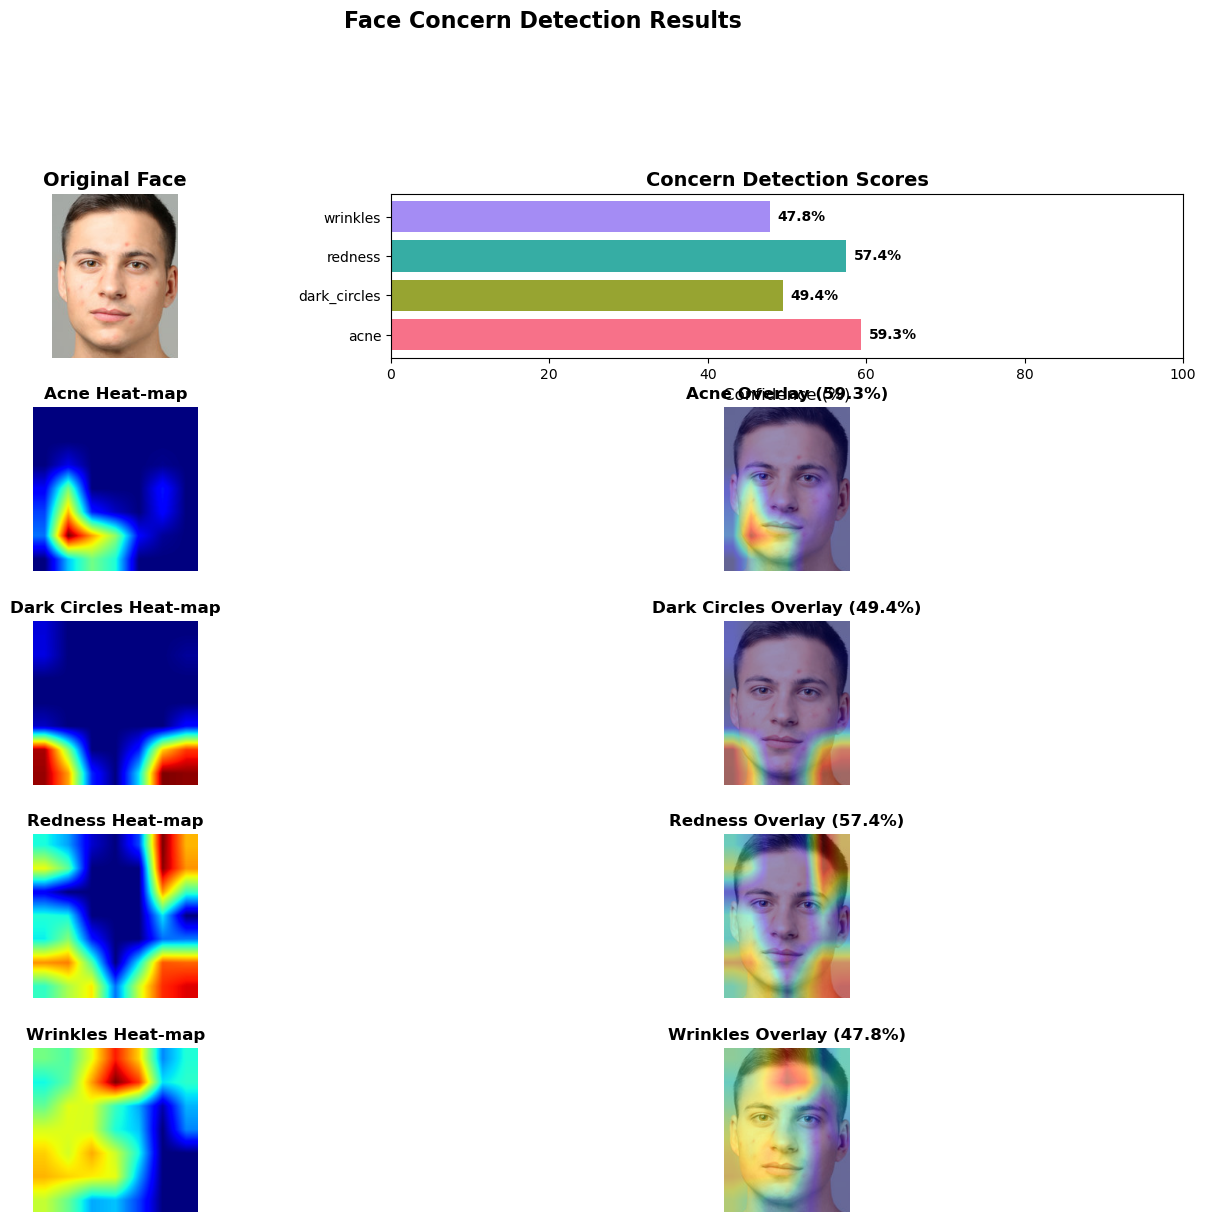

In [23]:
# Create comprehensive visualization
if 'scores' in locals():
    os.makedirs('outputs', exist_ok=True)
    plot_concern_results(
        original_image=original_face,
        scores=scores,
        heatmaps=heatmaps,
        save_path='outputs/detection_results.png'
    )
else:
    print("Please run the previous cell first to get detection results.")


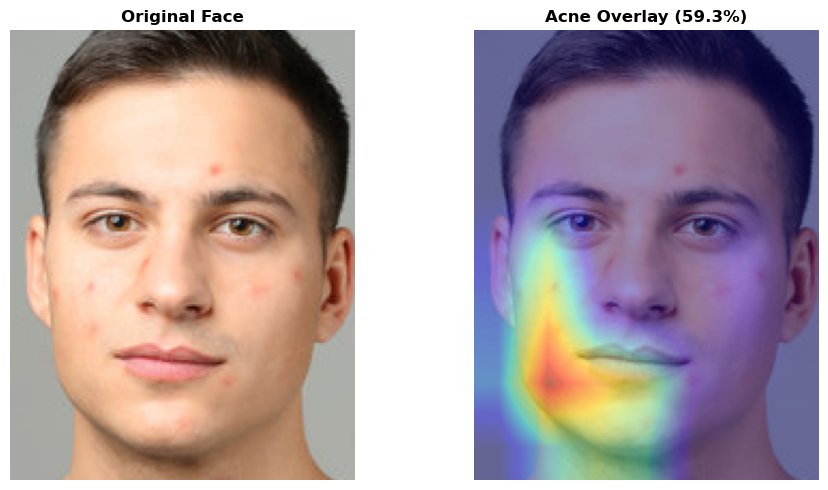

In [24]:
from src.visualization import overlay_heatmap_simple, create_side_by_side_comparison

if 'scores' in locals() and heatmaps:
    # Create overlay for the highest scoring concern
    top_concern = max(scores.items(), key=lambda x: x[1])
    concern_name, concern_score = top_concern
    
    if concern_name in heatmaps:
        overlay = overlay_heatmap_simple(original_face, heatmaps[concern_name])
        
        create_side_by_side_comparison(
            images=[original_face, overlay],
            titles=[
                'Original Face',
                f'{concern_name.replace("_", " ").title()} Overlay ({concern_score:.1f}%)'
            ],
            save_path='outputs/comparison.png'
        )


## Summary

This notebook demonstrates:
1. ✅ Model loading from saved weights
2. ✅ Image preprocessing and face detection
3. ✅ Multi-label classification inference
4. ✅ Confidence score extraction
5. ✅ Grad-CAM heat-map generation
6. ✅ Visualization of results

**For production use:**
- Train on a real labeled dataset
- Validate on diverse test images
- Fine-tune hyperparameters
- Deploy via Flask API (see app.py)


# Analyze sample_images/test2.jpg

This section loads the trained model and runs inference on `sample_images/test2.jpg`, showing the detection scores and overlays for each detected concern. Run the following cells in a Python (CPU) kernel that has the project's virtual environment packages installed.

In [7]:
# Setup and load model
import os
import sys

# Ensure project root is importable from the notebook
project_root = os.getcwd()
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import matplotlib.pyplot as plt
from src.model import load_model
from src.inference import predict
from src.visualization import plot_concern_results

# Paths: explicitly point to test2.jpg
MODEL_PATH = os.path.join(project_root, 'models', 'best_model.pth')
IMAGE_PATH = os.path.join(project_root, 'sample_images', 'test2.jpg')  # <-- using test2.jpg
OUTPUT_DIR = os.path.join(project_root, 'outputs')

print('Model path:', MODEL_PATH)
print('Image path:', IMAGE_PATH)

# Load model (CPU)
model = load_model(MODEL_PATH, device='cpu')
print('Model loaded.')


Model path: c:\Users\Sanjay\OneDrive\Desktop\Face Concern Detector\models\best_model.pth
Image path: c:\Users\Sanjay\OneDrive\Desktop\Face Concern Detector\sample_images\test2.jpg
Model loaded.
Model loaded.


IMAGE_PATH = c:\Users\Sanjay\OneDrive\Desktop\Face Concern Detector\sample_images\test2.jpg
Loaded image shape (H,W,C): (408, 612, 3)

MTCNN.detect_faces returned:
[{'box': [225, 71, 185, 248], 'confidence': np.float64(0.9997698664665222), 'keypoints': {'nose': [np.int64(312), np.int64(210)], 'mouth_right': [np.int64(352), np.int64(260)], 'right_eye': [np.int64(356), np.int64(168)], 'left_eye': [np.int64(273), np.int64(170)], 'mouth_left': [np.int64(279), np.int64(260)]}}]

Top detection (confidence, box, keypoints):
confidence = 0.9997698664665222
box = [225, 71, 185, 248]
keypoints = {'nose': [np.int64(312), np.int64(210)], 'mouth_right': [np.int64(352), np.int64(260)], 'right_eye': [np.int64(356), np.int64(168)], 'left_eye': [np.int64(273), np.int64(170)], 'mouth_left': [np.int64(279), np.int64(260)]}

MTCNN.detect_faces returned:
[{'box': [225, 71, 185, 248], 'confidence': np.float64(0.9997698664665222), 'keypoints': {'nose': [np.int64(312), np.int64(210)], 'mouth_right': [np.int64

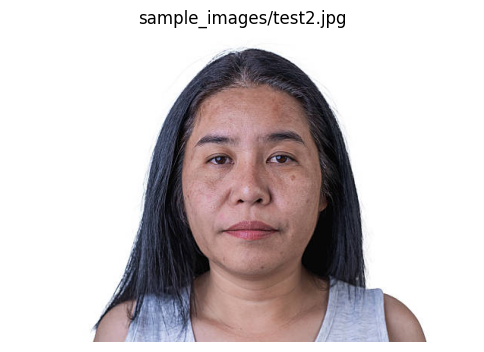

In [9]:
# Debug: display image and run MTCNN detector to see raw results
# Run this after the setup cell (so IMAGE_PATH is defined).
import os
import numpy as np
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import cv2
from PIL import Image

print('IMAGE_PATH =', IMAGE_PATH)

# Try loading with cv2 first, fall back to PIL if cv2 fails
img_bgr = cv2.imread(IMAGE_PATH)
if img_bgr is None:
    print('cv2.imread failed, trying PIL.Image')
    img_pil = Image.open(IMAGE_PATH).convert('RGB')
    img_rgb = np.array(img_pil)
else:
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

print('Loaded image shape (H,W,C):', img_rgb.shape)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('sample_images/test2.jpg')

# Run MTCNN detector directly and print raw output
detector = MTCNN()
results = detector.detect_faces(img_rgb)
print('\nMTCNN.detect_faces returned:')
print(results)

if not results:
    print('\nNo faces found by MTCNN. Possible causes:')
    print('- face is very small, occluded or profile')
    print('- unusual lighting or color space issues')
    print("Options: try 'test1.jpg', crop the face manually, or increase image size/contrast and retry.")
else:
    best = max(results, key=lambda x: x.get('confidence', 0))
    print('\nTop detection (confidence, box, keypoints):')
    print('confidence =', best.get('confidence'))
    print('box =', best.get('box'))
    print('keypoints =', best.get('keypoints'))


Processing image: c:\Users\Sanjay\OneDrive\Desktop\Face Concern Detector\sample_images\test2.jpg
Detection scores: {'acne': 58.460384368896484, 'dark_circles': 50.917903900146484, 'redness': 59.4316291809082, 'wrinkles': 44.22816848754883}
Detection scores: {'acne': 58.460384368896484, 'dark_circles': 50.917903900146484, 'redness': 59.4316291809082, 'wrinkles': 44.22816848754883}
Detection scores:
  acne: 58.46%
  dark_circles: 50.92%
  redness: 59.43%
  wrinkles: 44.23%
Detection scores:
  acne: 58.46%
  dark_circles: 50.92%
  redness: 59.43%
  wrinkles: 44.23%


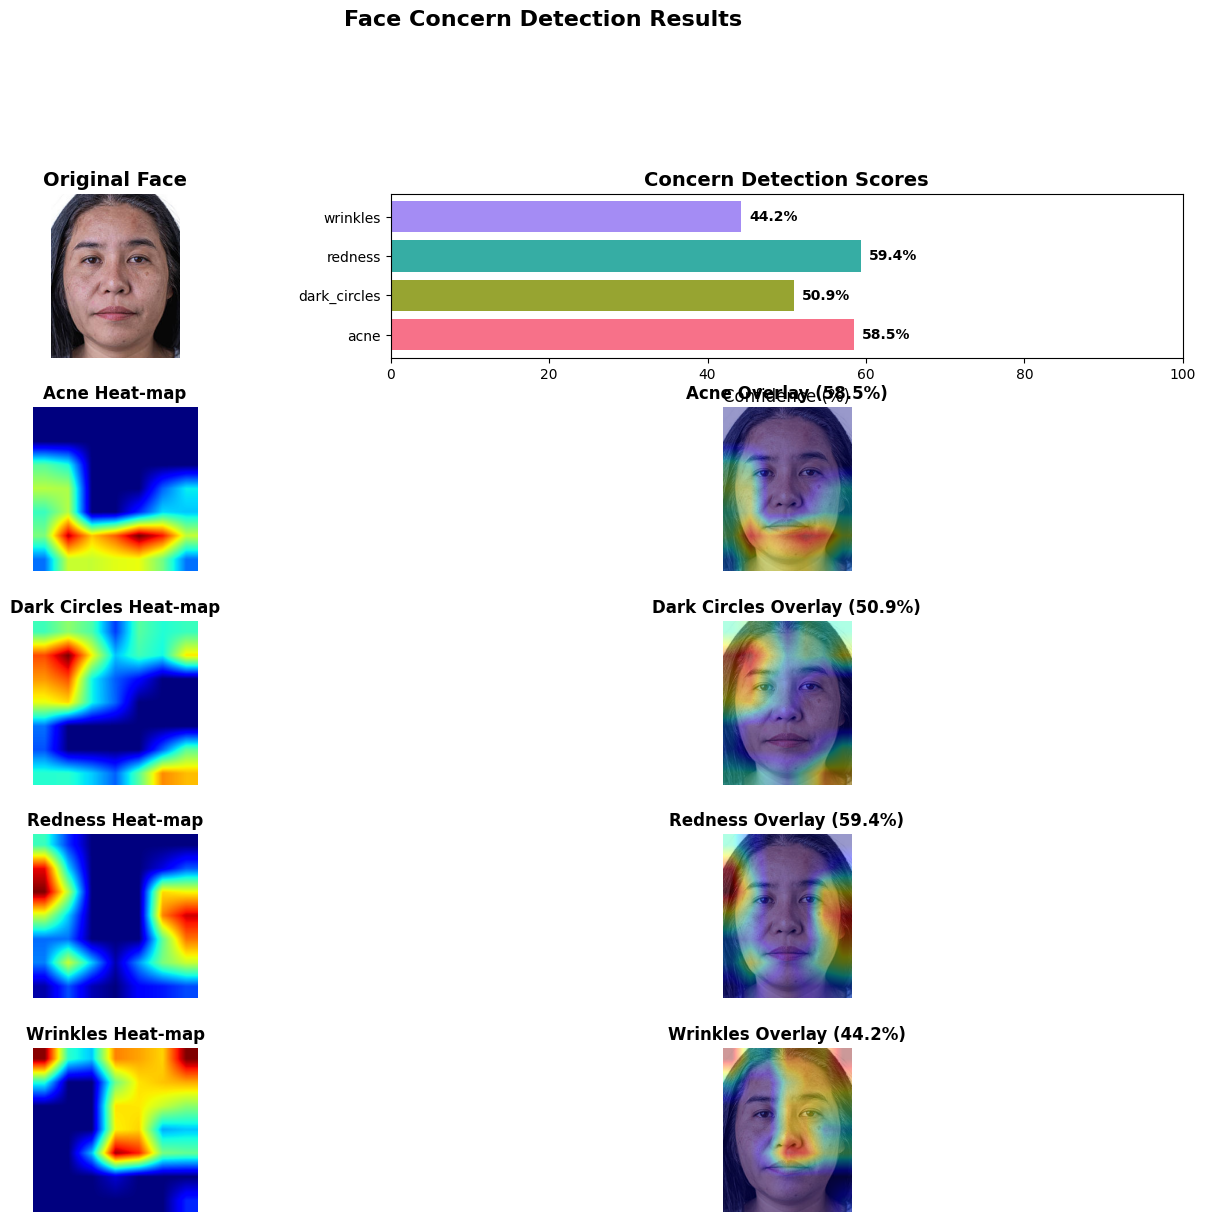

Visualization saved to c:\Users\Sanjay\OneDrive\Desktop\Face Concern Detector\outputs\test2_results.png


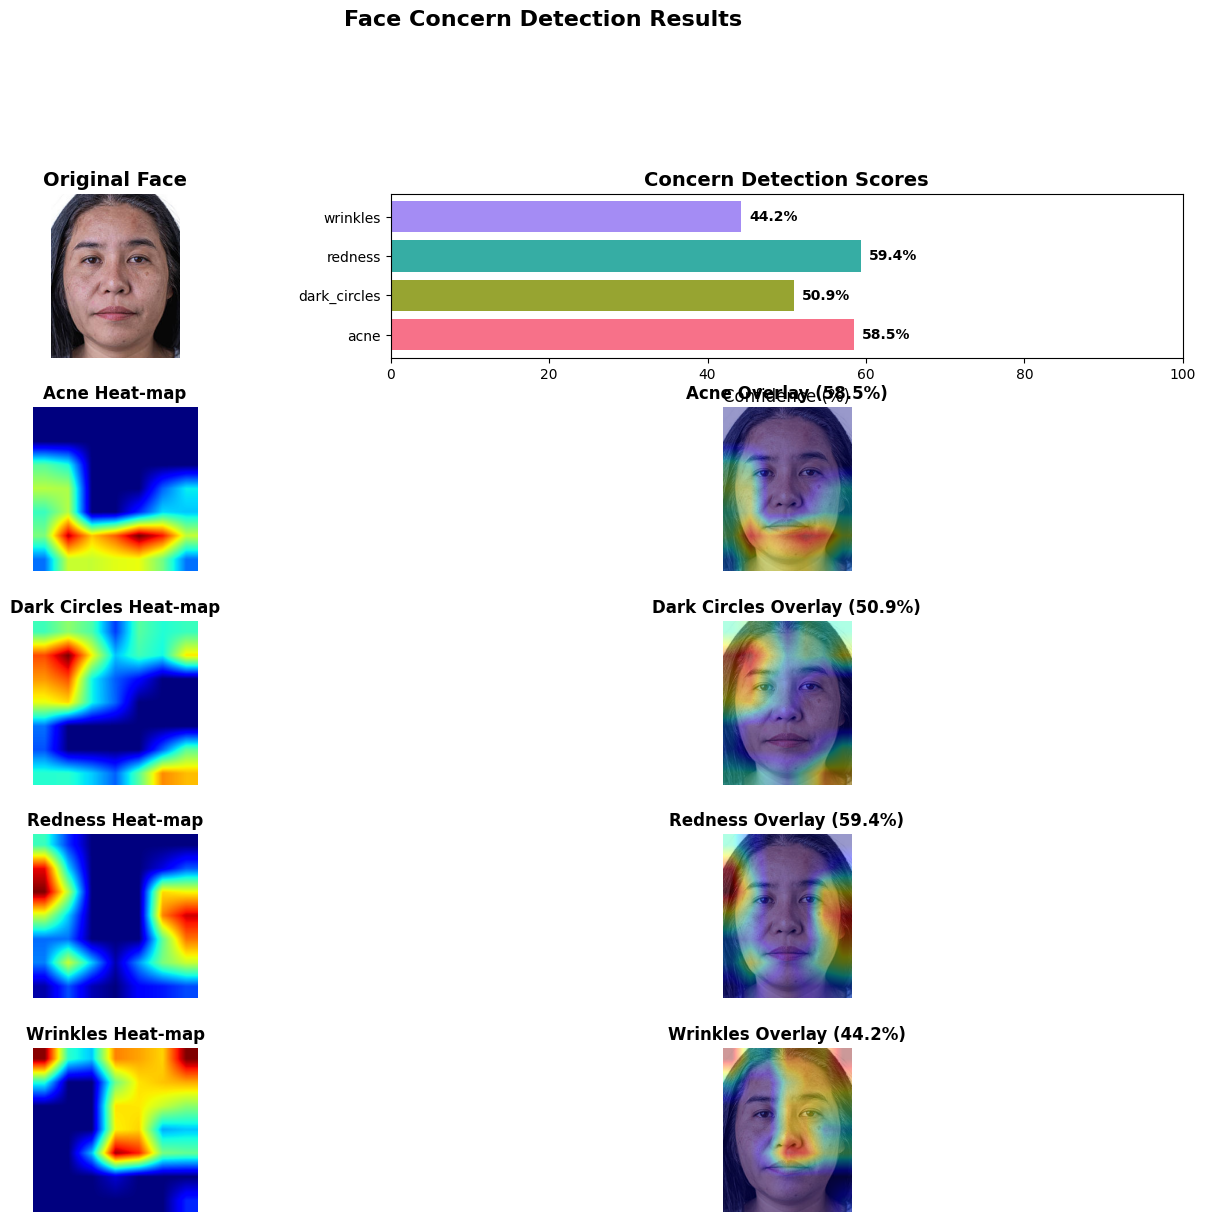

Saved combined visualization to c:\Users\Sanjay\OneDrive\Desktop\Face Concern Detector\outputs\test2_results.png


In [10]:
# Run inference on test2.jpg and plot results
scores, heatmaps, original_face = predict(model, IMAGE_PATH, device='cpu', generate_heatmaps=True, save_overlay=False)

print('Detection scores:')
for k, v in scores.items():
    print(f"  {k}: {v:.2f}%")

# Display results using the project's visualization helper
plot_concern_results(original_face, scores, heatmaps)

# Optionally save a combined visualization to outputs/
combined_save_path = os.path.join(OUTPUT_DIR, 'test2_results.png')
plot_concern_results(original_face, scores, heatmaps, save_path=combined_save_path)
print('Saved combined visualization to', combined_save_path)
